In [32]:
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:,.3f}'.format)

Balaji = pd.read_csv('Data_input\Balaji Fast Food Sales.csv',index_col=0)

In [33]:
Balaji.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date                1000 non-null   object
 1   item_name           1000 non-null   object
 2   item_type           1000 non-null   object
 3   item_price          1000 non-null   int64 
 4   quantity            1000 non-null   int64 
 5   transaction_amount  1000 non-null   int64 
 6   transaction_type    893 non-null    object
 7   received_by         1000 non-null   object
 8   time_of_sale        1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 78.1+ KB


In [35]:
Balaji.isna().sum()

date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

In [36]:
Balaji.isna().any(axis=1)
Balaji[Balaji.isna().any(axis=1)]

,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
order_id,,,,,,,,,
1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
16,4/14/2022,Sandwich,Fastfood,60,11,660,NaN,Mrs.,Midnight
32,05-06-2022,Aalopuri,Fastfood,20,4,80,NaN,Mr.,Morning
41,11/13/2022,Cold coffee,Beverages,40,11,440,NaN,Mr.,Afternoon
47,07-10-2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Morning
...,...,...,...,...,...,...,...,...,...
988,01-03-2023,Frankie,Fastfood,50,13,650,NaN,Mrs.,Night
996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening


In [37]:
Balaji.duplicated().sum()

0

In [38]:
Balaji['item_type'].unique()

array(['Fastfood', 'Beverages'], dtype=object)

In [58]:
Balaji['item_type'] = Balaji['item_type'].astype('category')
Balaji.dtypes

date                  datetime64[ns]
item_name                     object
item_type                   category
item_price                     int64
quantity                       int64
transaction_amount             int64
transaction_type            category
received_by                   object
time_of_sale                  object
yearmonth                  period[M]
dtype: object

In [40]:
Balaji['transaction_type'].unique()

[NaN, 'Cash', 'Online']
Categories (2, object): ['Cash', 'Online']

In [41]:
Balaji_d = Balaji.copy()
Balaji_d.dtypes

date                    object
item_name               object
item_type             category
item_price               int64
quantity                 int64
transaction_amount       int64
transaction_type      category
received_by             object
time_of_sale            object
dtype: object

In [42]:
Balaji['transaction_type'] = Balaji['transaction_type'].astype('object')
Balaji.dtypes

date                    object
item_name               object
item_type             category
item_price               int64
quantity                 int64
transaction_amount       int64
transaction_type        object
received_by             object
time_of_sale            object
dtype: object

In [43]:
Balaji['transaction_type'] = Balaji['transaction_type'].fillna('unknown')
Balaji.head()

,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
order_id,,,,,,,,,
1,07-03-2022,Aalopuri,Fastfood,20,13,260,unknown,Mr.,Night
2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [44]:
Balaji['transaction_type'] = Balaji['transaction_type']. astype('category')
Balaji.dtypes

date                    object
item_name               object
item_type             category
item_price               int64
quantity                 int64
transaction_amount       int64
transaction_type      category
received_by             object
time_of_sale            object
dtype: object

In [45]:
Balaji['transaction_type'].unique()

['unknown', 'Cash', 'Online']
Categories (3, object): ['Cash', 'Online', 'unknown']

In [46]:
Balaji['date']= pd.to_datetime(Balaji['date'],format='mixed')
Balaji.dtypes


date                  datetime64[ns]
item_name                     object
item_type                   category
item_price                     int64
quantity                       int64
transaction_amount             int64
transaction_type            category
received_by                   object
time_of_sale                  object
dtype: object

In [47]:

Balaji['yearmonth'] = Balaji['date'].dt.to_period('M')
Balaji

,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,yearmonth
order_id,,,,,,,,,,
1,2022-07-03,Aalopuri,Fastfood,20,13,260,unknown,Mr.,Night,2022-07
2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon,2022-08
3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon,2022-11
4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night,2023-02
5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening,2022-10
...,...,...,...,...,...,...,...,...,...,...
996,2023-03-19,Frankie,Fastfood,50,10,500,unknown,Mrs.,Evening,2023-03
997,2022-09-20,Sandwich,Fastfood,60,7,420,unknown,Mr.,Evening,2022-09
998,2023-01-26,Sandwich,Fastfood,60,13,780,unknown,Mr.,Evening,2023-01


<Axes: title={'center': 'Sales Amount'}, xlabel='Period', ylabel='Total Transaction'>

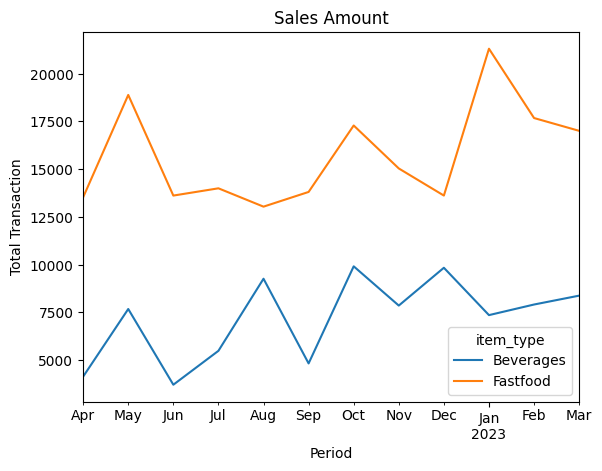

In [48]:
Balaji_TS = pd.crosstab(index=Balaji['yearmonth'],
            columns=Balaji['item_type'],
            values=Balaji['transaction_amount'],
            aggfunc='sum')

Balaji_TS.plot(kind='line',
               title='Sales Amount',
               xlabel='Period',
               ylabel='Total Transaction')

<Axes: title={'center': 'transaction_amount'}, xlabel='item_type'>

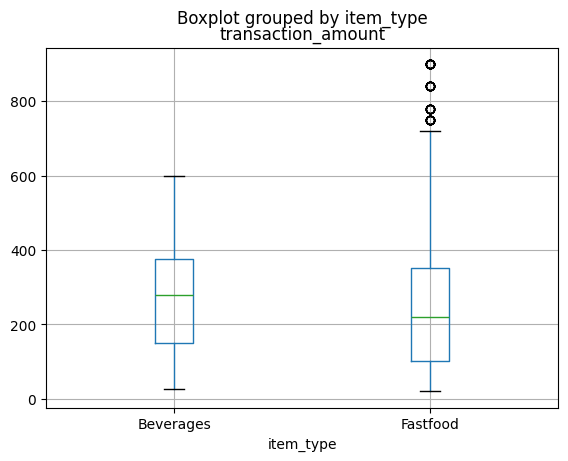

In [49]:
Balaji.boxplot(column='transaction_amount',
                  by= 'item_type')

In [53]:
# Data outlier berdasarkan transaction_amount
Balaji[Balaji['transaction_amount'] > 800 ]

,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,yearmonth
order_id,,,,,,,,,,
48,2023-02-23,Sandwich,Fastfood,60,14,840,Online,Mr.,Afternoon,2023-02
96,2022-08-22,Sandwich,Fastfood,60,15,900,unknown,Mr.,Morning,2022-08
138,2022-09-01,Sandwich,Fastfood,60,15,900,Online,Mr.,Night,2022-09
145,2022-10-09,Sandwich,Fastfood,60,14,840,Online,Mr.,Morning,2022-10
361,2022-06-30,Sandwich,Fastfood,60,15,900,unknown,Mrs.,Night,2022-06
388,2022-10-09,Sandwich,Fastfood,60,14,840,Cash,Mr.,Evening,2022-10
445,2022-10-22,Sandwich,Fastfood,60,14,840,Online,Mrs.,Morning,2022-10
477,2023-02-13,Sandwich,Fastfood,60,15,900,Cash,Mrs.,Midnight,2023-02
492,2022-07-11,Sandwich,Fastfood,60,15,900,Cash,Mr.,Afternoon,2022-07


In [19]:
Balaji_tm = Balaji.pivot_table(index='time_of_sale',
                   values='transaction_amount',
                   aggfunc='sum').sort_values('transaction_amount', ascending=False)
Balaji_tm

,transaction_amount
time_of_sale,
Night,62075
Afternoon,56345
Morning,53730
Evening,52355
Midnight,50725


<Axes: title={'center': 'Transaction Amont'}, xlabel='time_of_sale', ylabel='transaction_amount'>

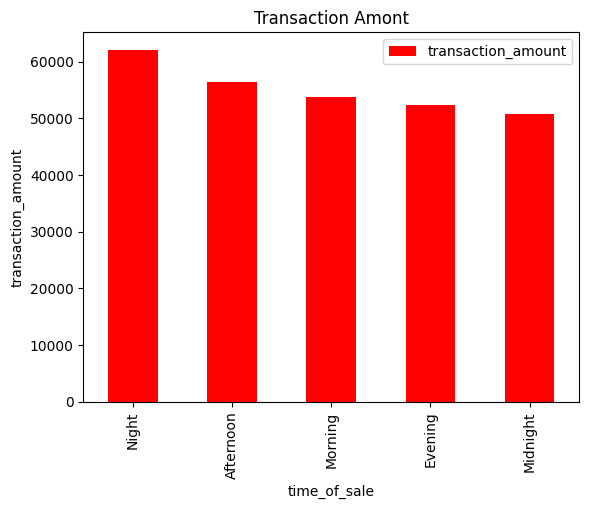

In [20]:
Balaji_tm.plot(
    kind='bar',
    title='Transaction Amont',
    xlabel='time_of_sale',
    ylabel='transaction_amount',
    color='red'
)

*Assignment from Kaggel*

(1) Analyzing sales trends over time.
(2) Understanding customer preferences for different items.
(3) Evaluating the impact of payment methods on revenue.
(4) Investigating the performance of staff members based on gender.
(5) Exploring the popularity of items at different times of the day


<Axes: ylabel='yearmonth'>

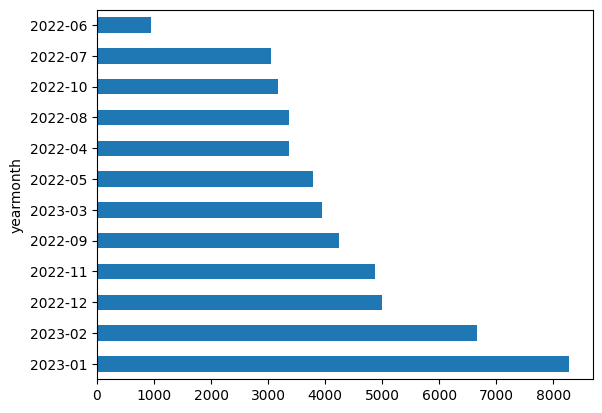

In [21]:
 # (1) Analyzing sales trends over time.

Sales_overtime = pd.crosstab(index=Balaji['yearmonth'],
            columns=Balaji['time_of_sale'],
            values=Balaji['transaction_amount'],
            aggfunc='sum').sort_values('Midnight', ascending=False) ['Midnight']

Sales_overtime.plot(kind='barh')



*Insight*
- The highest sales occur during the overtime period in January 2023

<Axes: title={'center': 'Quantity Sales'}, xlabel='Item_name', ylabel='Quantity'>

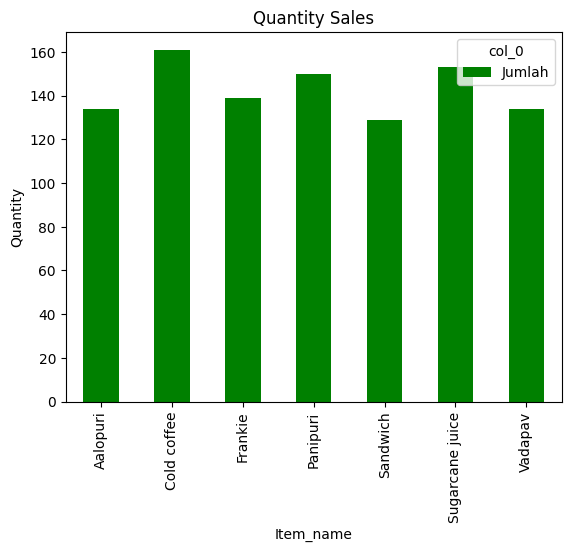

In [22]:
# (2) Understanding customer preferences for different items.

P_name = pd.crosstab(index=Balaji['item_name'],
            columns= 'Jumlah',
            values=Balaji['quantity'],
            aggfunc='count')
P_name.plot(
    kind='bar',
    title= 'Quantity Sales',
    xlabel= 'Item_name',
    ylabel = 'Quantity',
    color= 'green')

*Insight*
- the best-selling products being cold coffee and sugarance juice

<Axes: ylabel='transaction_type'>

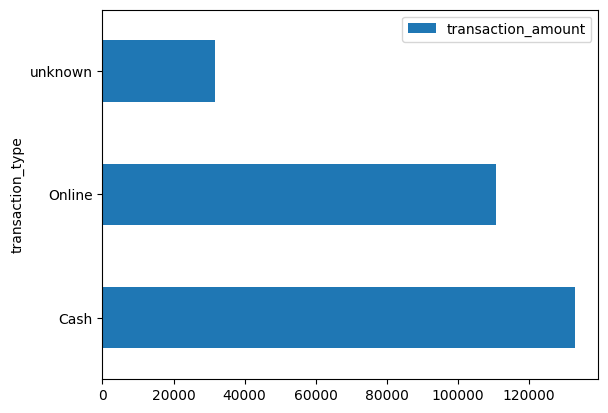

In [23]:
# (3) Evaluating the impact of payment methods on revenue.

Balaji_tp = Balaji.pivot_table(index='transaction_type',
                   values='transaction_amount',
                   aggfunc='sum').sort_values('transaction_amount', ascending=False)
Balaji_tp.plot(kind='barh')


*Insight*
- The cash payment method indicates the highest transaction volume

In [24]:
# (4) Investigating the performance of staff members based on gender.
Balaji_performence = Balaji['received_by'].value_counts()
Balaji_performence

received_by
Mr.     512
Mrs.    488
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x22ed955ded0>,
 [Text(-0.08119628122357139, 1.096999163133438, 'Mr'),
  Text(0.0811962812235715, -1.096999163133438, 'Mrs')],
 [Text(-0.04428888066740257, 0.598363179890966, '52%'),
  Text(0.04428888066740263, -0.598363179890966, '48%')])

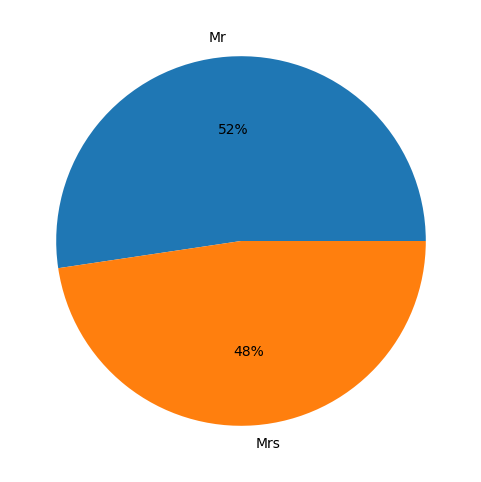

In [25]:
reveivedBy = ['Mr','Mrs']
staff_counts = [512, 466]
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(staff_counts, labels = reveivedBy, autopct='%1.0f%%')

*Insight*
- The performance of male staff is slightly superior to that of female staff, but not significantly.

In [26]:
# (5) Exploring the popularity of items at different times of the day
Balaji_fav = Balaji.pivot_table(index='item_name',
                                columns='time_of_sale',
                                values='quantity',
                                aggfunc='sum')
Balaji_fav


time_of_sale,Afternoon,Evening,Midnight,Morning,Night
item_name,,,,,
Aalopuri,226,136,223,215,244
Cold coffee,337,235,203,287,299
Frankie,238,240,198,204,270
Panipuri,230,241,278,233,244
Sandwich,164,206,201,234,292
Sugarcane juice,325,283,237,206,227
Vadapav,194,199,235,195,183


<Axes: xlabel='item_name'>

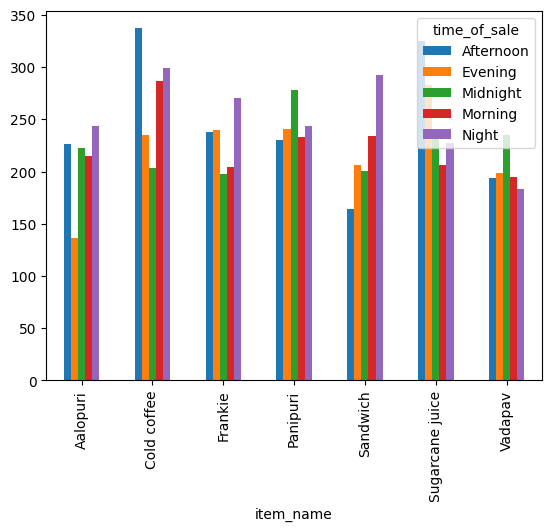

In [104]:
Balaji_fav.plot(kind='bar')

*Insight*
- The highest total sales of products occur during the afternoon and night.
- "The highest sales volume occurs in the afternoon, with the best-selling products being cold coffee and sugarance juice.
- "In the evening, the best-selling products are cold coffee and sandwich.